# ６章　確率

- P(*E*) は事象*E*の発生する確率を表す
- 事象*E*が起きるかどうか知る事で事象*F*が起きるかどうかの情報が得られる場合、２つの事象は従属関係にあるという

## 6.2 条件付き確率

- P(E|F) = P(E,F)/P(F)
- P(E,F) = P(E|F)P(F)   とも書き換えられる
- P(E|F) = P(E)  事象Eと事象Fが独立ならこの式が成り立つ。

In [6]:
# 2人の子供の性別

import enum, random

# enum.Enumは列挙型定数を生成するクラス
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    # [Kid.BOY, Kid.GIRL]からランダムに１つ選ぶ
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    # Kid.BOYからKid.GIRLをランダムに取得
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

# 一人目が女の子の時に二人とも女の子の確率
print(both_girls / older_girl)

# どちらかが女の子の時に二人とも女の子の確率
print(both_girls / either_girl)


0.5007089325501317
0.3311897106109325


## 6.3　ベイズの定理

P(E|F) = P(F|E)P(E) / [P(F|E)P(E) + P(F, ¬E) P( ¬E)] 

- 発症する割合が10000人あたり1人である疾患があるとしこの疾患を99%の正確さで検出できる（陽性or陰性）検査があるとする
- 「検査結果が陽性である」事象をT、「疾患を持っている」事象をDとすると。ベイズの定理では検査が陽性であった場合に疾患を持っている

ベイズの定理では検査が陽性であった場合に、疾患を持っている確率 P(D|T)は

P(D | T) = P(T | D)P(D)/[P(T | D)P(D) + P(T | ¬D)P(¬D)]

- P(T|D) 疾患を持つ人が検索で陽性となる確率は0.99であることがわかっている
- P(D) ある人が疾患を持つ確率は1/10,000 = 0.0001
-  P(T | ¬D) 疾患を持ったないがテストで陽性となる確率は 0.01
- P(¬D) ある人が疾患を持たない確率は0.9999


In [5]:
# これらの値を代入するとP(D|T)が得られる

0.99*0.0001/(0.99*0.0001 + 0.01*0.9999)

0.00980392156862745

## 6.4　確率変数

- 確率変数とは確率分布に関連づいた値を持つ変数
- 6.2の2人の子供の例にならうと、Xを女の子の数を表す確率変数とするとXが０の時条件つき確率は1/4、Xが１の場合は1/2となる
- 変数によってある値の確率が決まるような変数？？と考えると良い？？？

## 6.5 連続確率分布

- コイン投げは離散分布に相当し離散的な結果に対する確率に関連づけられる
- 　一方連続した結果の分布をモデル化する必要も生じる
- 一様分布は0から１のすべての数に対して等しい重みを与える

## 6.6　正規分布

- 正規分布は平均μ（ミュー）と標準偏差σ（シグマ）の２つのパラメータで定義される


In [12]:
# 確率密度関数の実装

import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 /2 /sigma ** 2) /(SQRT_TWO_PI * sigma))

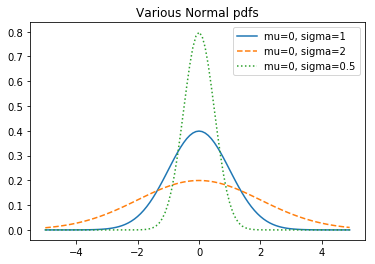

In [13]:
import matplotlib.pyplot as plt

# -5から5のレンジで正規分布の確率密度関数（PDF）をプロットすると
xs = [x /10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

## 6.7 中心極限定理

- 独立で同一の分布に従う多数の確率変数の平均として定義される確率変数はおおよそ正規分布になる。というもの